In [138]:
import pandas as pd
import tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
import numpy as np
import pydot
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OrdinalEncoder

In [2]:
data = pd.read_csv('csvfile_global_twitter_processed.csv')

In [3]:
data.head()

,created_at,id,id_str,original_text,truncated,display_text_range,entities,metadata,source,user,...,favorite_count,favorited,retweeted,lang,polarity,subjectivity,LENGTH,preprocessed,sentiment,clean
0,2022-08-07 22:31:20+00:00,1556407673284861952,1556407673284861952,RT @i_ameztoy: Extra random image (I):\n\nLets...,False,"[0, 143]","{'hashtags': [{'text': 'City', 'indices': [132...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...","{'id': 3418339671, 'id_str': '3418339671', 'na...",...,0,False,False,en,-1.250000e-01,0.190625,23,rt iameztoy extra random imag let focu one spe...,negative,rt iameztoy extra random imag let focu one spe...
1,2022-08-07 22:31:16+00:00,1556407654373027840,1556407654373027840,RT @IndoPac_Info: #China's media explains the ...,False,"[0, 140]","{'hashtags': [{'text': 'China', 'indices': [18...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...","{'id': 1003562923, 'id_str': '1003562923', 'na...",...,0,False,False,en,-1.000000e-01,0.100000,24,rt indopacinfo china medium explain militari r...,negative,rt indopacinfo china medium explain militari r...
2,2022-08-07 22:31:07+00:00,1556407616208773122,1556407616208773120,"China even cut off communication, they don't a...",False,"[0, 161]","{'hashtags': [{'text': 'XiJinping', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...","{'id': 1132320481506406400, 'id_str': '1132320...",...,0,False,False,en,0.000000e+00,0.000000,26,china even cut commun dont anwer phonecal u cl...,neutral,china even cut commun dont anwer phonecal u cl...
3,2022-08-07 22:31:06+00:00,1556407614602461185,1556407614602461184,"Putin to #XiJinping : I told you my friend, Ta...",False,"[0, 179]","{'hashtags': [{'text': 'XiJinping', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...","{'id': 1132320481506406400, 'id_str': '1132320...",...,0,False,False,en,1.000000e-01,0.350000,33,putin xijinp tell friend taiwan vassal state i...,positive,putin xijinp tell friend taiwan vassal state i...
4,2022-08-07 22:31:04+00:00,1556407604238245889,1556407604238245888,"RT @ChinaUncensored: I’m sorry, I thought Taiw...",False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 1260798065373523969, 'id_str': '1260798...",...,0,False,False,en,-6.938894e-18,0.556250,21,rt chinauncensor i’m sorri think taiwan indepe...,negative,rt chinauncensor i’m sorri think taiwan indepe...


In [142]:
X = data['clean']
y = data['sentiment']

In [143]:
# Encode labels and create classes

le = LabelEncoder()
le.fit(data['sentiment'])
label_encoded_train = le.transform(data['sentiment'])
print("\n\nClasses: ", le.classes_)

# Convert labels into categorical values
label_onehot_train = to_categorical(label_encoded_train)
print("\nNumber of One Hot encoded class labels train: ", label_onehot_train.shape[1])



Classes:  ['negative' 'neutral' 'positive']

Number of One Hot encoded class labels train:  3


In [144]:
%time

SEED = 42
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(data['clean'], label_onehot_train, random_state = SEED, stratify=label_encoded_train, test_size = 0.12)

#x_val, x_test, y_val, y_test = train_test_split(
#    X_test, y_test, test_size=.4, stratify= y_test, random_state=SEED)

Wall time: 1e+03 µs


In [145]:
(X_train.shape, y_train.shape),(X_test.shape, y_test.shape)

(((19360,), (19360, 3)), ((2640,), (2640, 3)))

In [146]:
vocab_size = 30000
#vocab_size = len(word_index) + 1
# len(word_index) + 1
oov_token = "<OOV>"
max_length = 40
dim = 200
padding_type = "post"
trunction_type="post"

In [147]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token, split=' ', filters=' ')
tokenizer.fit_on_texts(X_train)

In [148]:
word_index = tokenizer.word_index

In [149]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
len(X_train_sequences)

19360

In [150]:
# Get max training sequence length
maxlen = max([len(x) for x in X_train_sequences])
maxlen

76

In [151]:
X_train_padded = pad_sequences(X_train_sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunction_type)

In [152]:
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunction_type)

In [153]:
(X_train_padded.shape, y_train.shape),(X_test_padded.shape, y_test.shape)

(((19360, 40), (19360, 3)), ((2640, 40), (2640, 3)))

In [154]:
num_words = min(vocab_size, len(word_index)) + 1
print(num_words)

16245


In [156]:
# Load glove embeddings
hits = 0
misses = 0
print('Loading glove word vectors ...')
embeddings_index = dict()

try:
    f = open('data/glove.6B.200d.txt', encoding='utf-8')
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
except Exception as e:
    print('Stacktrace', e)
    print('glove file does not exist.')
finally:
    f.close()

print('Loaded %s glove word vectors.' % len(embeddings_index))


# Create a weight matrix for all the words

print('\nMapping words to glove embeddings ...')
embedding_matrix = np.zeros((num_words, dim))

for word, index in tokenizer.word_index.items():
    if index > vocab_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector
            hits += 1
        else:
            misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

print('Shape of Embedding Matrix: ', embedding_matrix.shape)
print('glove Mapping done.')

Loading glove word vectors ...
Loaded 400000 glove word vectors.

Mapping words to glove embeddings ...
Converted 5624 words (10620 misses)
Shape of Embedding Matrix:  (16245, 200)
glove Mapping done.


In [157]:
embedding_matrix.shape

(16245, 200)

In [158]:
len(word_index)

16244

In [159]:
embeddings_index.get('pelosi')

array([ 0.14802  ,  0.018174 , -0.079296 , -0.65311  , -0.50593  ,
       -0.16365  ,  0.091    ,  0.87207  ,  0.42749  ,  0.44687  ,
        0.027586 ,  0.66256  , -0.11676  , -0.54934  , -0.33345  ,
        0.12273  , -0.14677  , -0.67266  , -0.38841  , -0.50951  ,
        0.25709  ,  0.62525  , -0.48971  ,  0.038238 ,  0.27801  ,
        0.066046 , -0.24887  , -0.62144  ,  0.11811  ,  0.14869  ,
       -0.49203  , -0.49615  ,  0.61249  ,  0.60299  , -0.73105  ,
        0.18087  , -0.23041  , -0.6218   ,  0.44788  , -0.1374   ,
       -0.28252  ,  0.40837  ,  0.2816   ,  0.1401   , -0.41043  ,
       -0.28187  , -0.198    ,  0.25354  , -0.64488  ,  0.11146  ,
        0.93601  , -0.35285  ,  0.76951  ,  0.12367  ,  0.35222  ,
        0.42206  ,  0.33324  , -0.43543  , -0.30755  , -0.027056 ,
        0.76662  , -0.22356  ,  0.80341  ,  0.13955  ,  0.48534  ,
       -0.653    , -0.62314  ,  0.34143  ,  0.64893  ,  0.13789  ,
       -0.15139  ,  0.073464 , -0.14872  , -0.32428  ,  0.3191

### Creating the keras Embedding layer

In [160]:
import keras

In [161]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.SparseCategoricalAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [162]:
import time
from tensorflow.keras.callbacks import TensorBoard

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

#tb_callback = tf.keras.callbacks.TensorBoard(log_dir = DIR_MODELS + '/to/logs')
NAME = 'SENTIMENT_CNNBiLSTM_MODEL'

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))


In [163]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

lr = (ReduceLROnPlateau(monitor='val_loss',factor=.4, patience=3, min_lr = .0005))

In [164]:
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight('balanced',
                                             np.unique(data['sentiment']),
                                             data['sentiment']))

weights={}
for index, weight in enumerate(class_weights):
    weights[index]=weight
weights

TypeError: compute_class_weight() takes 1 positional argument but 3 were given

### CNN-BiLSTM Model

In [165]:
def get_lstm_cnn_model():
    embedding_dim = 200
    inp = tf.keras.layers.Input(shape=(max_length, ))
    x = Embedding(num_words, embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=False , mask_zero = True)(inp)
    x = SpatialDropout1D(0.2)(x)
    
    x = Bidirectional(LSTM(256, return_sequences=True))(x)
    
    x = Conv1D(128, kernel_size = 2, padding = "valid", kernel_initializer = "he_uniform")(x)
    x = Conv1D(128, kernel_size = 3, padding = "valid", kernel_initializer = "he_uniform")(x)
    x = Conv1D(128, kernel_size = 4, padding = "valid", kernel_initializer = "he_uniform")(x)
    #x = Conv1D(64, kernel_size = 4, padding = "valid", kernel_initializer = "he_uniform")(x)
    
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    
    conc = tf.keras.layers.concatenate([avg_pool, max_pool])
    
    dense = Dense(128, activation="relu")(conc)
    
    outp = Dense(3, activation="softmax")(dense)
    
    model = Model(inputs=inp, outputs=outp)
    
    adam = tf.keras.optimizers.Adam(lr=1e-3)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# Create the model

lstm_cnn_model = get_lstm_cnn_model()

# plot_model(lstm_cnn_model, to_file='/lstm_cnn_model.png',  show_shapes=True, show_layer_names=True)


C:\Users\hp\anaconda3\envs\Excell-Chatbot\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [166]:
history = lstm_cnn_model.fit(x=X_train_padded, y=y_train, validation_split = 0.15, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
129/129 [==============================] - 110s 756ms/step - loss: 0.5824 - accuracy: 0.7522 - val_loss: 0.4414 - val_accuracy: 0.8168
Epoch 2/10
129/129 [==============================] - 85s 658ms/step - loss: 0.3492 - accuracy: 0.8608 - val_loss: 0.3527 - val_accuracy: 0.8598
Epoch 3/10
129/129 [==============================] - 95s 736ms/step - loss: 0.2729 - accuracy: 0.8958 - val_loss: 0.3012 - val_accuracy: 0.8829
Epoch 4/10
129/129 [==============================] - 90s 700ms/step - loss: 0.2159 - accuracy: 0.9167 - val_loss: 0.3247 - val_accuracy: 0.8784
Epoch 5/10
129/129 [==============================] - 90s 696ms/step - loss: 0.1854 - accuracy: 0.9282 - val_loss: 0.3483 - val_accuracy: 0.8809
Epoch 6/10
129/129 [==============================] - 92s 716ms/step - loss: 0.1431 - accuracy: 0.9457 - val_loss: 0.3407 - val_accuracy: 0.8953
Epoch 7/10
129/129 [==============================] - 91s 706ms/step - loss: 0.1127 - accuracy: 0.9568 - val_loss: 0.3325 - val_a

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 40)]         0           []                               
                                                                                                  
 embedding_18 (Embedding)       (None, 40, 200)      3249000     ['input_19[0][0]']               
                                                                                                  
 spatial_dropout1d_17 (SpatialD  (None, 40, 200)     0           ['embedding_18[0][0]']           
 ropout1D)                                                                                        
                                                                                                  
 bidirectional_16 (Bidirectiona  (None, 40, 512)     935936      ['spatial_dropout1d_17[0][

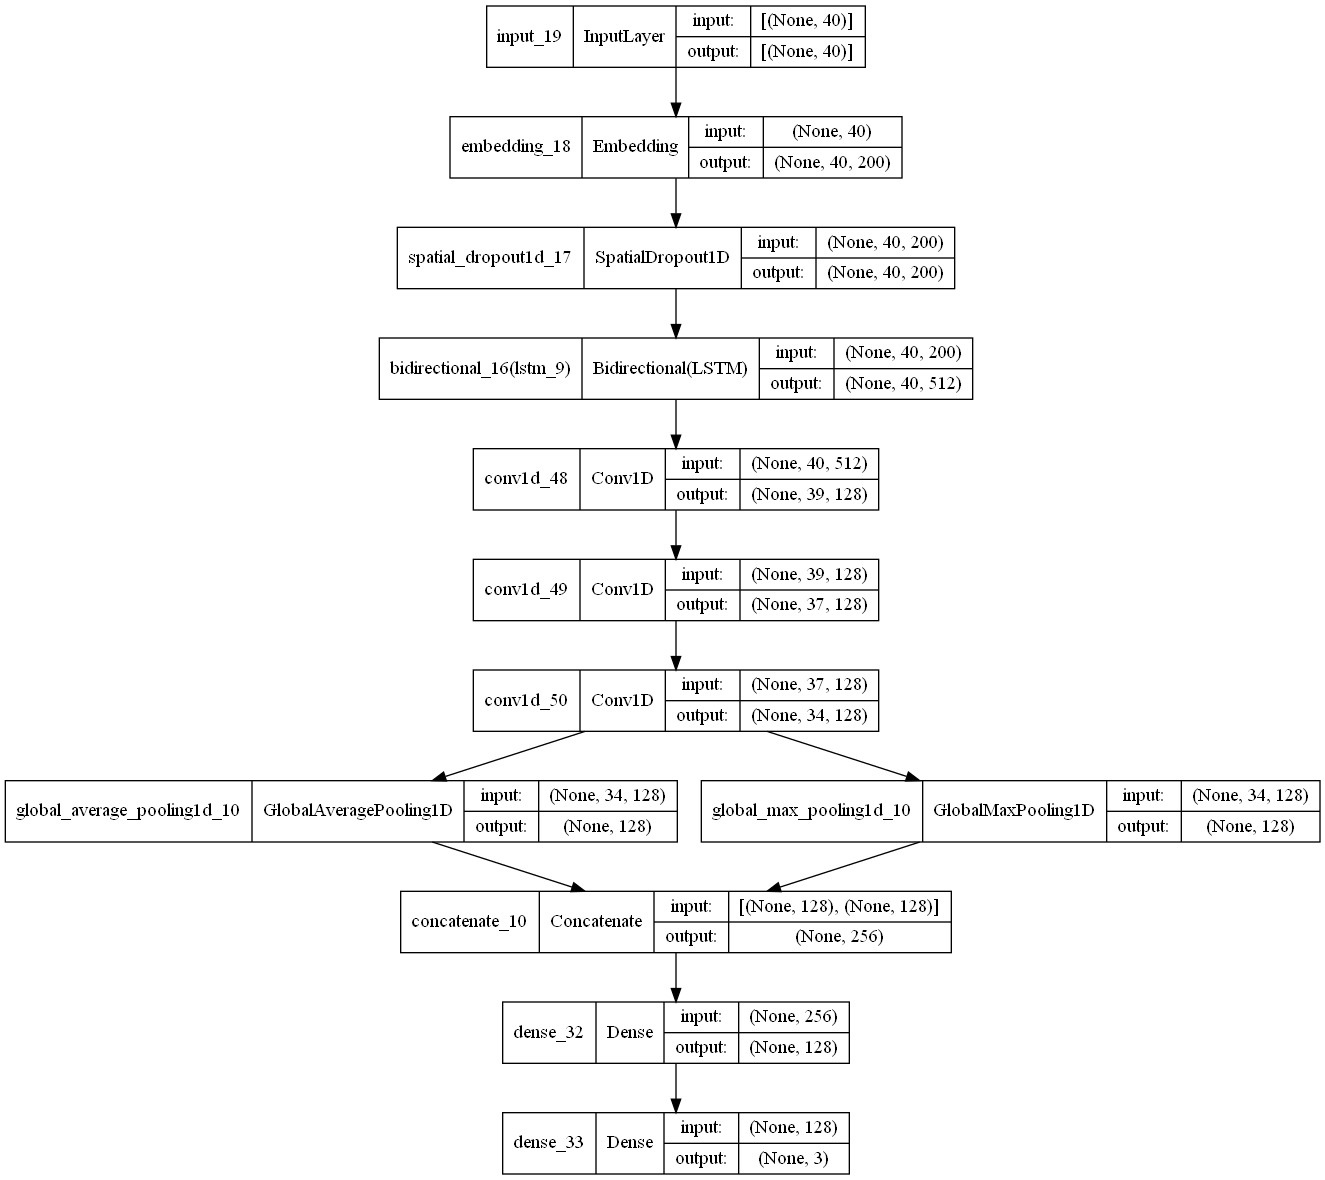

In [167]:
# summarize
print(lstm_cnn_model.summary())
plot_model(lstm_cnn_model, show_shapes=True, to_file='model_attention.png')

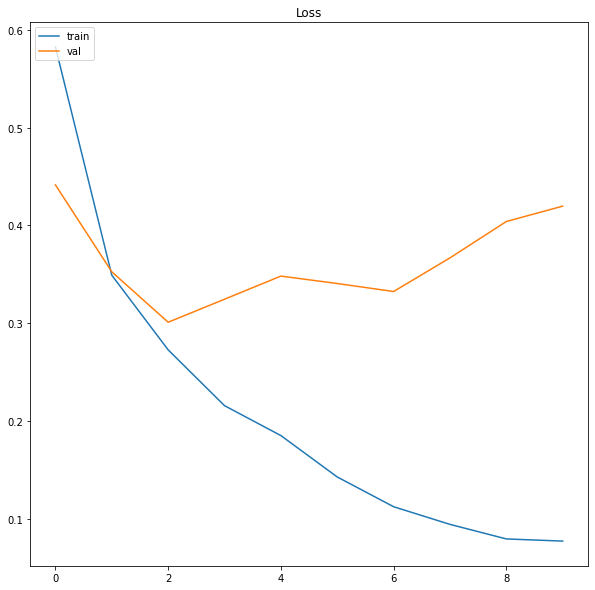

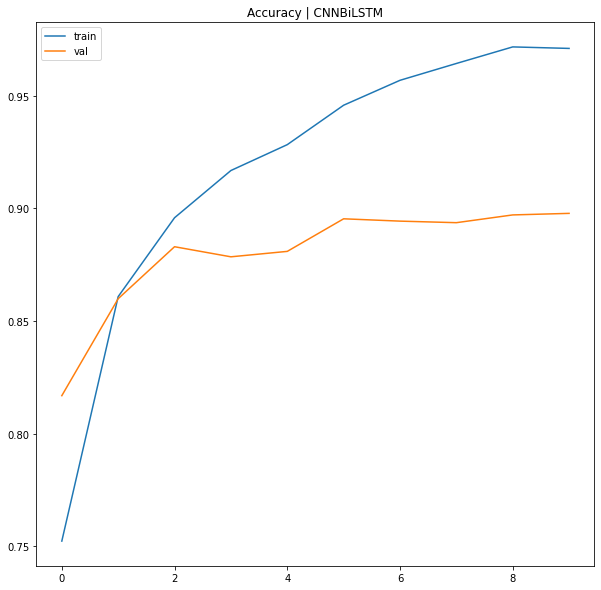

In [168]:
# Plotting Loss and Accuracy Graphs
plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy | CNNBiLSTM')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [169]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = lstm_cnn_model.evaluate([X_test_padded], y_test, batch_size=64)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = lstm_cnn_model.predict(X_test_padded[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
42/42 [==============================] - 12s 136ms/step - loss: 0.3730 - accuracy: 0.9045
test loss, test acc: [0.37304073572158813, 0.9045454263687134]
Generate predictions for 3 samples
predictions shape: (3, 3)


In [170]:
lstm_cnn_model.save('sentiment_model_LSTM_CNN_v.1.0.h5')

In [171]:
rounded_predictions = np.argmax(lstm_cnn_model.predict([X_test_padded]), axis = 1)
rounded_labels = np.argmax(y_test, axis = 1)
#rounded_labels[1]
accuracy_score(rounded_predictions, rounded_labels)

print(classification_report(rounded_predictions, rounded_labels))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       526
           1       0.91      0.95      0.93      1027
           2       0.95      0.86      0.90      1087

    accuracy                           0.90      2640
   macro avg       0.89      0.91      0.90      2640
weighted avg       0.91      0.90      0.90      2640



In [172]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(rounded_predictions, rounded_labels)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[481  20  25]
 [ 23 977  27]
 [ 76  81 930]]


In [173]:
from sklearn.metrics import cohen_kappa_score
cohen_score = cohen_kappa_score(rounded_labels, rounded_predictions)
cohen_score

0.8518300749669263